# Practica 3: Tarea de regresión
## Dataset: <a src="https://www.kaggle.com/datasets/talhabarkaatahmad/pakistan-used-car-prices-2023">Pakistan Used Car Prices 2023</a>

<style>
    div{
        width: 100%;
        height: 300px;
    }
    img{
        width:95%;
    }
</style>
<div><img src="banner.jpg"></div>

### Acerca del Dataset
Estos datos se han extraído de *PakWheels*, el sitio web de la empresa de venta de autos de segunda mano más conocida (en Pakistán). Los datos contienen aproximadamente más de *78.000* autos con *13* características diferentes y el precio como objetivo.

#### *Features*:
<html>
    <ol>
        <li><i>ad_ref</i> : Referencia única del anuncio.</li><br>
        <li><i>city</i> : Ciudad del anuncio (lugar donde se vende el auto).</li><br>
        <li><i>assembly</i> : Si es importado o es local.</li><br>
        <li><i>body</i> : Tipo de carrocería del auto.</li><br>
        <li><i>make</i> : Fabricante del auto.</li><br>
        <li><i>model</i> : Modelo del auto.</li><br>
        <li><i>year</i> : Año de fabricación.</li><br>
        <li><i>engine_cc</i> : Volumen del motor del auto.</li><br>
        <li><i>transmission</i> : Si es transmisión Manual o Automática</li><br>
        <li><i>fuel_type</i> : El tipo de combustible (Gasolina, diesel o híbrido).</li><br>
        <li><i>color</i> : Color del auto.</li><br>
        <li><i>registered</i> : Número de matrícula ciudad/provincia del auto.</li><br>
        <li><i>mileage</i> : El recorrido del auto mostrado en Kilómetros</li><br>
        <li><b>price</b> : Precio del auto en Pakistán</li><br>
    </ol>
</html>

### Creando el DataFrame

#### Importando las librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Leyendo los datos

In [3]:
df = pd.read_csv(f"pakwheels_used_cars.csv")
df

,ad_ref,assembly,body,ad_city,color,engine_cc,fuel_type,make,mileage,model,registered,transmission,year,price
0,7927285,Imported,Van,Lahore,Pearl White,2000.0,Hybrid,Nissan,124000,Serena,Un-Registered,Automatic,1905.0,8990000.0
1,7679303,Imported,Hatchback,Lahore,Grey,996.0,Petrol,Toyota,30738,Vitz,Punjab,Automatic,1905.0,4190000.0
2,7915479,NaN,Sedan,Lahore,Super white,1798.0,Petrol,Toyota,183000,Corolla,Punjab,Automatic,1905.0,3990000.0
3,7918380,NaN,Sedan,Lahore,Crystal Black Pearl,1500.0,Petrol,Honda,41000,Civic,Punjab,Automatic,1905.0,6490000.0
4,7676167,Imported,MPV,Lahore,Silver,3000.0,Petrol,Toyota,126000,Alphard,Punjab,Automatic,1905.0,4750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77232,7727137,Imported,Micro Van,Gujranwala,Black,660.0,Petrol,Suzuki,45000,Every,Un-Registered,Manual,1905.0,NaN
77233,7733253,NaN,Sedan,Karachi,Super White,1500.0,Petrol,Toyota,18000,Yaris,Karachi,Automatic,1905.0,4825000.0
77234,7719906,Imported,Micro Van,Gujranwala,Silver,660.0,Petrol,Suzuki,70000,Every,Un-Registered,Automatic,1905.0,NaN
77235,7627128,NaN,Sedan,Islamabad,Blue,1800.0,Petrol,Toyota,135600,Corolla,Islamabad,Automatic,1905.0,NaN


### Análisis Exploratorio

#### Objetivo: ¿Se puede predecir el precio de un auto con regresión lineal?

Se plantea la posibilidad de poder predecir los precios de los automóviles con base en las características presentadas en este Dataset. Por lo que se procede a realizar su análisis exploratorio tomando en cuenta este objetivo principal.

#### Observaciones del Dataset

##### *En Busca de variables continuas*.
A continuación analizamos la información que contiene nuestro Dataset, en donde podemos observar los tipos de datos que contienen, esto con el objetivo de poder conocer si contamos con variables continuas para crear un modelo de regresión lineal.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77237 entries, 0 to 77236
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ad_ref        77237 non-null  int64  
 1   assembly      23976 non-null  object 
 2   body          68372 non-null  object 
 3   ad_city       77237 non-null  object 
 4   color         75727 non-null  object 
 5   engine_cc     77235 non-null  float64
 6   fuel_type     76303 non-null  object 
 7   make          77237 non-null  object 
 8   mileage       77237 non-null  int64  
 9   model         77237 non-null  object 
 10  registered    77237 non-null  object 
 11  transmission  77237 non-null  object 
 12  year          72516 non-null  float64
 13  price         76588 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.2+ MB


Variables como el *year*, *engine_cc* y *milage* son muy buenos candidatos para poder crear nuestro modelo, sin embargo hay que analizarlos a con mayor detenimiento.

##### *Existan datos faltantes en el conjunto de datos:* 
Al realizar una sumatoria de todos los datos faltantes, donde la variable *assembly* resulta tener una mayor falta de datos, en la celda posterior se puede apreciar.

In [5]:
df.isnull().sum()

ad_ref              0
assembly        53261
body             8865
ad_city             0
color            1510
engine_cc           2
fuel_type         934
make                0
mileage             0
model               0
registered          0
transmission        0
year             4721
price             649
dtype: int64

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='conteo', ylabel='variables'>

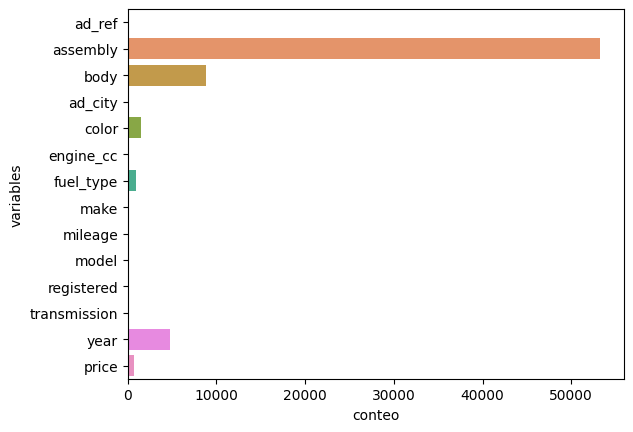

In [6]:
data = pd.DataFrame({'variables':df.columns.to_list(), 'conteo':df.isnull().sum().tolist()})
sns.barplot(data,y='variables', x='conteo')

##### *Análisis Estadístico de las variables continuas*

En este apartado podemos apreciar muchas características acerca de la naturaleza de estos datos, en donde nuestra variable *year* es potencialmente descartada como potencial variable para nuestro modelo de regresión lineal. Esto debido a que los datos en la columna *year* están totalmente sesgados, existiendo el valor *1905* en todas las columnas. Si aplicamos conocimientos del ámbito, podemos resaltar que el primer modelo Toyota corolla fue lanzado en el año *1966*.

In [7]:
df.describe() 

,ad_ref,engine_cc,mileage,year,price
count,7.723700e+04,77235.000000,77237.000000,72516.0,7.658800e+04
mean,7.797474e+06,1406.452062,91296.829589,1905.0,3.854193e+06
std,2.569679e+05,707.665165,89705.138633,0.0,5.576970e+06
min,2.748970e+05,3.000000,1.000000,1905.0,1.200000e+05
25%,7.792632e+06,1000.000000,34000.000000,1905.0,1.425000e+06
50%,7.853515e+06,1300.000000,80000.000000,1905.0,2.650000e+06
75%,7.897048e+06,1600.000000,123456.000000,1905.0,4.500000e+06
max,7.931906e+06,15000.000000,1000000.000000,1905.0,1.800000e+08


C:\Users\spoon\AppData\Local\Temp\ipykernel_5852\1889061585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['year'])
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wi

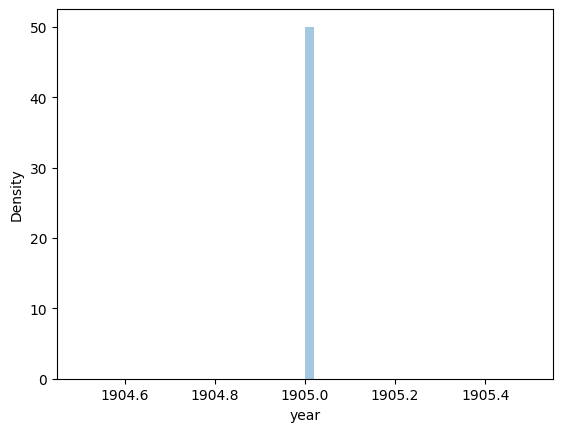

In [27]:
sns.distplot(x=df['year'])
plt.xlabel("year")
plt.show()

Sin embargo, es posible crear un modelo de regresión con las medidas del motor del auto y su kilometraje. En las siguientes celdas intentamos observar la dispersión que hay en estas variables y observar si es viable crear un modelo de regresión con estos datos.

C:\Users\spoon\AppData\Local\Temp\ipykernel_5852\2807087675.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['engine_cc'])
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

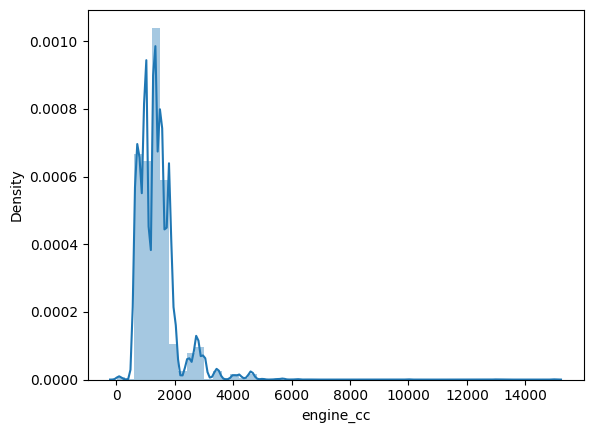

In [29]:
sns.distplot(x=df['engine_cc'])
plt.xlabel("engine_cc")
plt.show()

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will b

<Axes: xlabel='transmission', ylabel='engine_cc'>

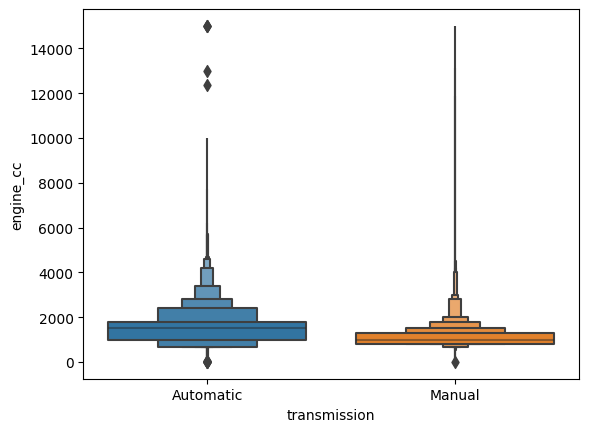

In [10]:
sns.boxenplot(data=df, y="engine_cc", x="transmission")

C:\Users\spoon\AppData\Local\Temp\ipykernel_5852\766403343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['mileage'])
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

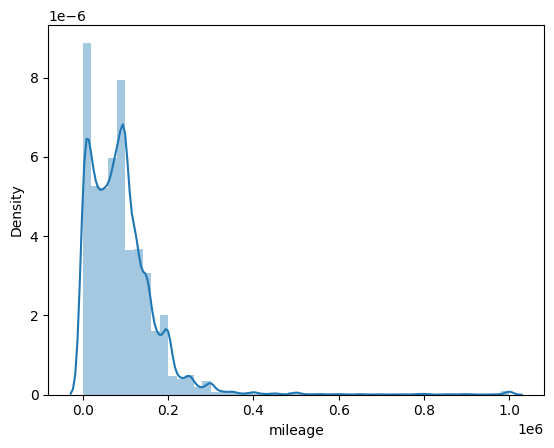

In [34]:
sns.distplot(x=df['mileage'])
plt.xlabel("mileage")
plt.show()

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will b

<Axes: xlabel='transmission', ylabel='mileage'>

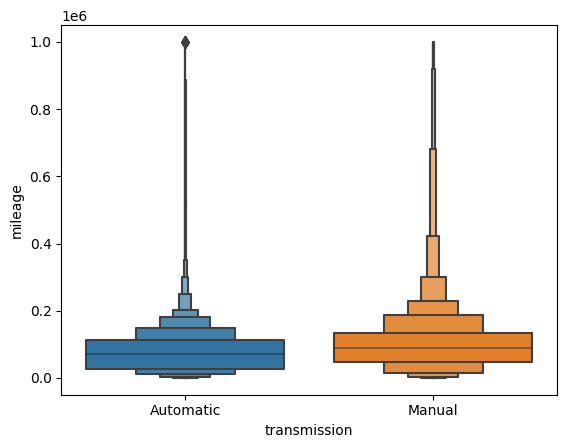

In [12]:
sns.boxenplot(data=df, y="mileage", x="transmission")

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

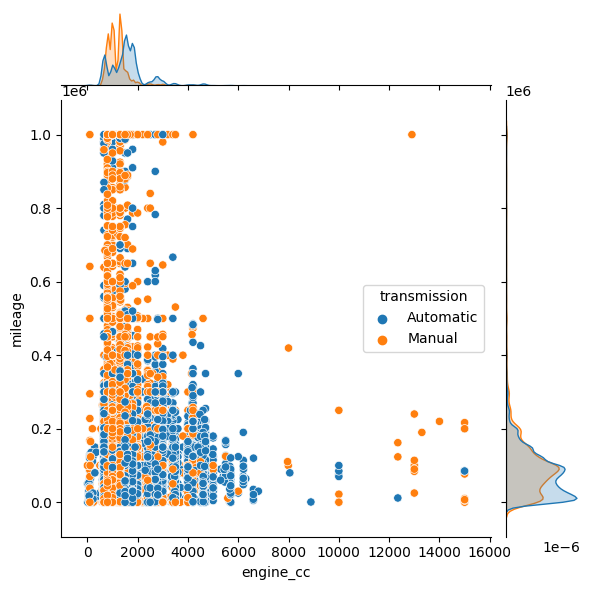

In [25]:
sns.jointplot(x='engine_cc', y='mileage', data=df,kind='scatter', hue="transmission")

En las celdas anteriores se puede observar que los datos existentes en las columnas *engine_cc* y *mileage* estan un poco sesgadas, y existen muchisimos *outliers* dentro de nuestros datos.

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

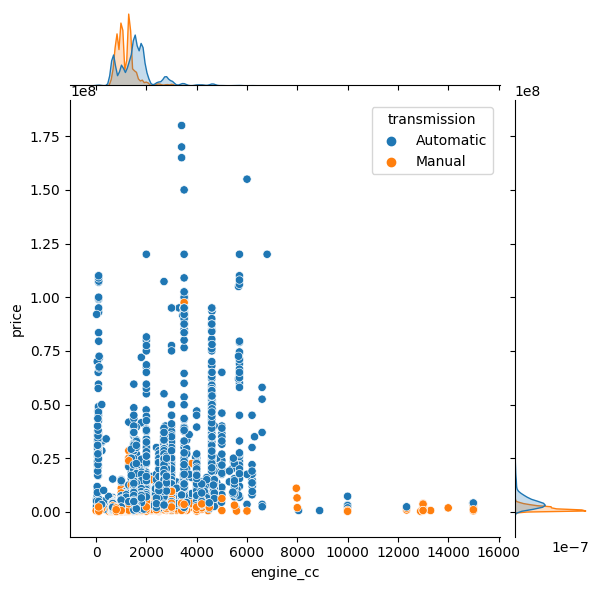

In [32]:
sns.jointplot(x='engine_cc', y='price', data=df,kind='scatter', hue="transmission")

c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\spoon\Documents\GitHub\ICD-Portfolio\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

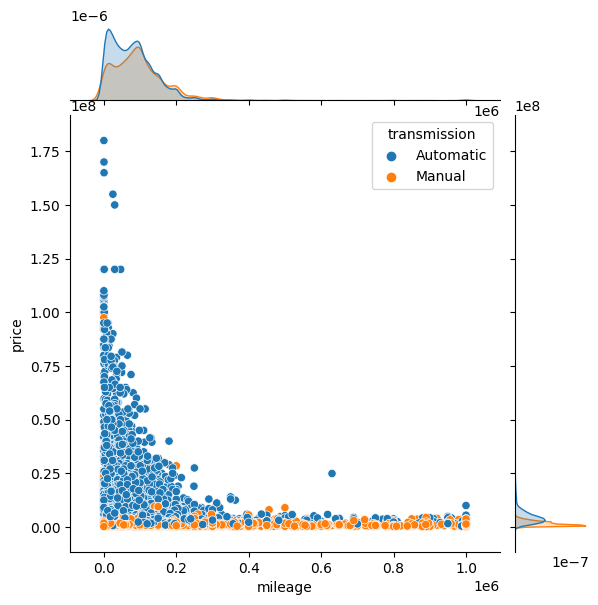

In [33]:
sns.jointplot(x='mileage', y='price', data=df,kind='scatter', hue="transmission")

En las celdas anteriores se puede observar que entre las variables independientes *mileage* y *engine_cc* no existe una relación lineal con la variable dependiente *price*. Esto significa que, a pesar de poder realizar un modelo de Regresión Lineal, este puede que no sea el método más efectivo para realizar una predicción del precio.

### Limpieza de datos

##### *Trabajando con los datos faltantes*

Como se mencionó al principio del análisis exploratorio, existen columnas con datos faltantes en nuestro conjunto de datos, entre estas columnas se encuentra nuestra variable dependiente (*price*) con *649* datos faltantes, por lo que al ser muy pocos datos estos serán retirados del Datset.

In [16]:
df = df.dropna(subset=["price", "engine_cc"])

In [17]:
df.isna().sum()

ad_ref              0
assembly        52925
body             8814
ad_city             0
color            1446
engine_cc           0
fuel_type         910
make                0
mileage             0
model               0
registered          0
transmission        0
year             4544
price               0
dtype: int64

### Creación del modelo de regresión lineal

En las siguientes celdas creamos el modelo de regresión lineal y analizamos los resultados obtenidos.

In [18]:
from sklearn.model_selection import train_test_split
X = df[["mileage", "engine_cc"]]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# Decidimos dividir los datos en 80/20.

In [19]:
# Entrenamos nuestro modelo.
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
modelo = regresion.fit(X_train, y_train)

In [20]:
# Realizamos nuestras predicciones.
y_pred = modelo.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
# Veamos los coeficienetes obtenidos
print('Coefficients: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -12.9381664  3884.04461371]
Independent term: 
 -399063.0877093873
Mean squared error: 21304830791684.84
Variance score: 0.26


Al observar los resultados de nuestro modelo, podemos concluir que no es para nada eficiente. Esto debido a que el error cuadrático medio nos indicia que la distancia promedio que existe entre el valor pronosticado y el valor real están muy alejados. Además podemos ver que la aptitud calculada con r2, es muy deficiente.

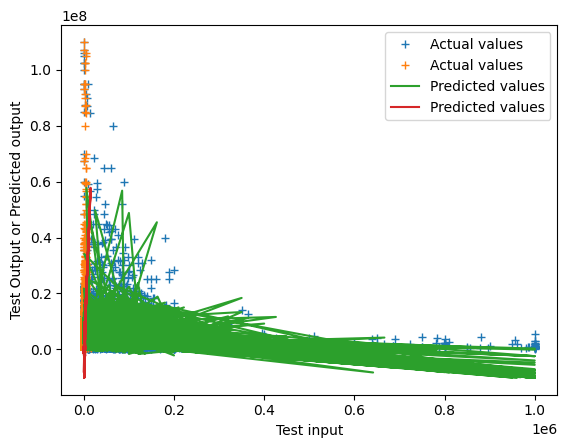

In [22]:
# Plot the regression line with actual data pointa
plt.plot(X_test, y_test, '+', label='Actual values')
plt.plot(X_test, y_pred,label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

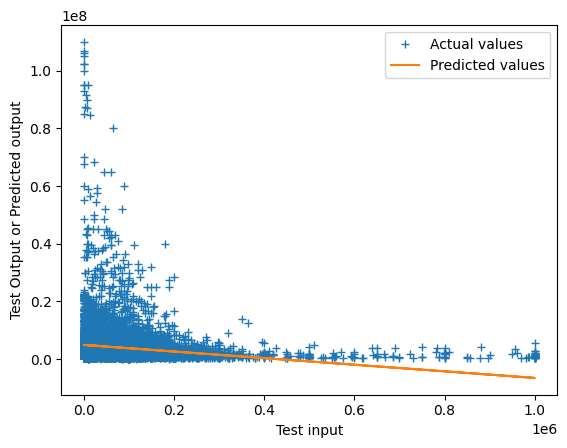

In [27]:
X = df[["mileage"]]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
regresion = LinearRegression()
modelo = regresion.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
plt.plot(X_test, y_test, '+', label='Actual values')
plt.plot(X_test, y_pred,label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()

### Conclusión

Al contestar nuestra pregunta *"¿Se puede predecir el precio de un auto con regresión lineal?"*, la respuesta rápida sería un <b>Sí</b>, pero es más complejo que eso. Para que una regresión lineal arroje buenos resultados, es necesario cumplir ciertas condiciones, por ejemplo, que las variables independientes tengan una relación lineal con la variable dependiente. Esta bandera roja se pudo notar durante el análisis exploratorio.

El conjunto de datos Pakistan Used Car Prices 2023 contiene muchos datos sesgados y muy alejados entre sí, además, la presencia de valores atípicos afecta también los resultados de nuestro modelo. Por lo que yo recomendaría probar otros algoritmos para realizar la predicción, además de trabajar con los valores atípicos e incluso recomendaría aumentar la muestra mediante recolección